In [11]:
import matplotlib.pyplot as plt
import bindcurve as bc
import numpy as np

# Direct binding

Loading data from quarto_website/tutorials/examples/direct.csv
   compound         c     log c  n_reps  rep1  rep2  rep3  rep4  median  \
0     probe  3.000000  0.477121       4   132   130   130   136   131.0   
1     probe  1.200000  0.079181       4   129   130   131   133   130.5   
2     probe  0.480000 -0.318759       4   129   130   126   130   129.5   
3     probe  0.192000 -0.716699       4   120   126   121   121   121.0   
4     probe  0.076800 -1.114639       4   106   103   106   107   106.0   
5     probe  0.030720 -1.512579       4    83    85    89    81    84.0   
6     probe  0.012288 -1.910519       4    59    64    61    62    61.5   
7     probe  0.004915 -2.308459       4    36    38    38    39    38.0   
8     probe  0.001966 -2.706399       4    31    33    34    36    33.5   
9     probe  0.000786 -3.104339       4    26    28    32    33    30.0   
10    probe  0.000315 -3.502279       4    25    32    30    28    29.0   

          SD       SEM  
0   2.82842

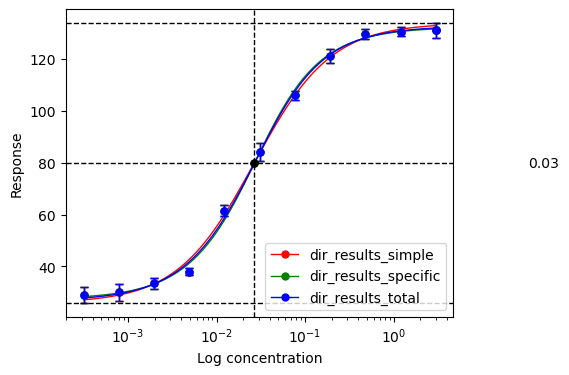

In [12]:
input_data = bc.load_csv("quarto_website/tutorials/examples/direct.csv")
print(input_data)


compounds = input_data["compound"].unique()
print("Detected compounds:", compounds)
print("No of compounds:", len(compounds))

min = 0
max = 1
LsT = 0.015       # [L]*T parameter

Ns = 0.5

dir_results_simple = bc.fit_Kd_direct(input_data, model="dir_simple", LsT=LsT, ci=True)
print(dir_results_simple)

dir_results_specific = bc.fit_Kd_direct(input_data, model="dir_specific", LsT=LsT, ci=True)
print(dir_results_specific)

dir_results_total = bc.fit_Kd_direct(input_data, model="dir_total", LsT=LsT, Ns=Ns, ci=True)
print(dir_results_total)


plt.figure(figsize=(5, 4))

bc.plot(input_data, dir_results_simple, single_color="red", single_label="dir_results_simple")
bc.plot(input_data, dir_results_specific, single_color="green", single_label="dir_results_specific")
bc.plot(input_data, dir_results_total, single_color="blue", single_label="dir_results_total")

bc.plot_asymptotes(dir_results_simple)
bc.plot_traces(dir_results_simple, value="Kds")
bc.plot_value(dir_results_simple, value="Kds", color="black", marker="o")

plt.xlabel("Log concentration")
plt.ylabel("Response")
plt.xscale("log")
plt.legend()
plt.show()

# Competitive binding

In [ ]:
input_data = bc.load_csv("quarto_website/tutorials/examples/competitive.csv")
print(input_data)


compounds = input_data["compound"].unique()
print("Detected compounds:", compounds)
print("No of compounds:", len(compounds))


RT = 0.05           # [R]T parameter
LsT = 0.005           # [L]*T parameter
Kds = 0.0245        # Kd of the probe

N = 5


IC50_results = bc.fit_50(input_data, model="IC50")
#IC50_results = IC50_results.sort_values(by=['IC50'], ascending=False)
print(IC50_results)

logIC50_results = bc.fit_50(input_data, model="logIC50")
print(logIC50_results)

Kd_results_3st_specific = bc.fit_Kd_competition(input_data, model="comp_3st_specific", RT=RT, LsT=LsT, Kds=Kds)
print(Kd_results_3st_specific)

Kd_results_3st_total = bc.fit_Kd_competition(input_data, model="comp_3st_total", RT=RT, LsT=LsT, Kds=Kds, N=N)
print(Kd_results_3st_total)

Kd_results_4st_specific = bc.fit_Kd_competition(input_data, model="comp_4st_specific", RT=RT, LsT=LsT, Kds=Kds, fix_ymin=25)
print(Kd_results_4st_specific)

Kd_results_4st_total = bc.fit_Kd_competition(input_data, model="comp_4st_total", RT=RT, LsT=LsT, Kds=Kds, N=N, fix_ymin=25)
print(Kd_results_4st_total)


Loading data from quarto_website/tutorials/examples/competitive.csv
   compound        c     log c  n_reps   r1   r2   r3   r4   r5   r6  median  \
0     comp1  2000.00  3.301030       6   28   26   29   27   27   25    27.0   
1     comp1  1000.00  3.000000       6   30   28   30   28   32   32    30.0   
2     comp1   250.00  2.397940       6   37   40   37   41   42   38    39.0   
3     comp1    60.00  1.778151       6   60   58   54   58   53   57    57.5   
4     comp1    15.00  1.176091       6   82   84   78   85   84   85    84.0   
5     comp1     4.00  0.602060       6   94   88   91   97   95  100    94.5   
6     comp1     1.00  0.000000       6   97   98   96  102  103  106   100.0   
7     comp1     0.25 -0.602060       6  100  100  101  106  106  108   103.5   
8     comp1     0.06 -1.221849       6  100  101  102   97  109  109   101.5   
9     comp2  2000.00  3.301030       6   27   29   31   26   27   30    28.0   
10    comp2  1000.00  3.000000       6   24   28   2

## Plot competitive binding

In [ ]:
plt.figure(figsize=(5, 4))

bc.plot(input_data, IC50_results, single_color="black", single_label="IC50_results")
#data.plot(input_data, logIC50_results, single_color="grey", single_label="logIC50_results")

bc.plot(input_data, Kd_results_3st_specific, single_color="red", single_label="Kd_results_3st_specific")
bc.plot(input_data, Kd_results_3st_total, single_color="green", single_label="Kd_results_3st_total")
bc.plot(input_data, Kd_results_4st_specific, single_color="blue", single_label="Kd_results_4st_specific")
bc.plot(input_data, Kd_results_4st_total, single_color="purple", single_label="Kd_results_4st_total")

plt.xlabel("Log concentration")
plt.ylabel("Response")
plt.xscale("log")
plt.legend()
plt.show()

## Plot grid

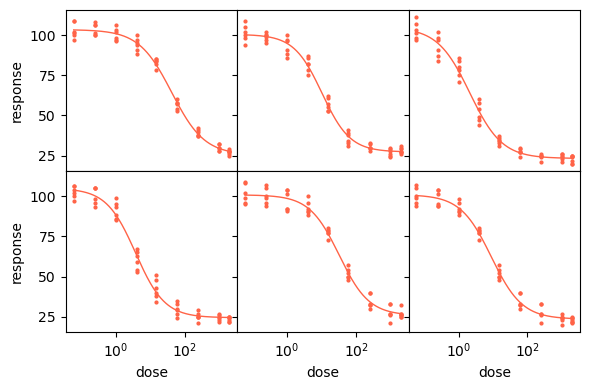

In [ ]:
bc.plot_grid(input_data, IC50_results, compound_sel=False, n_cols=3, figsize=(6,4), single_color="tomato", show_title=False, show_legend=False,
               show_all_data=True, show_medians=False, show_errorbars=False,
               markersize=2,
               hspace=0, wspace=0, show_inner_ticklabels=False)

# Plotting components

## plotting components - saturation


In [ ]:
RT = 5           # [R]T parameter
LsT = 5           # [L]*T parameter
Kds = 100        # Kd of the probe

min = 0
max = 1

N = 10

x_curve = np.logspace(np.log10(0.001), np.log10(10000), 1000)

model = bc.dir_specific(x_curve, min, max, LsT, Kds)[0]
R = bc.dir_specific(x_curve, min, max, LsT, Kds)[1]
RLs = bc.dir_specific(x_curve, min, max, LsT, Kds)[2]
Ls = bc.dir_specific(x_curve, min, max, LsT, Kds)[3]

plt.axhline(y = LsT, label="LsT", linestyle = '--')
#plt.plot(x_curve, model, label="model", linestyle="-")
#plt.plot(x_curve, R, label="R", linestyle="-")
plt.plot(x_curve, RLs, label="RLs", linestyle="-")
plt.plot(x_curve, Ls, label="Ls", linestyle="-")
#plt.plot(x_curve, L, label="L", linestyle="-")

plt.xscale("log")
#plt.yscale("log")
plt.legend()
plt.show()

## plotting components - competition

In [ ]:
RT = 0.5           # [R]T parameter
LsT = 5           # [L]*T parameter
Kds = 1000        # Kd of the probe

min = 0
max = 1

Kd = 1000

N = 0

x_curve = np.logspace(np.log10(0.001), np.log10(10000), 1000)

model = bc.comp_3st_total(x_curve, min, max, RT, LsT, Kds, Kd, N)[0]
R = bc.comp_3st_total(x_curve, min, max, RT, LsT, Kds, Kd, N)[1]
RLs = bc.comp_3st_total(x_curve, min, max, RT, LsT, Kds, Kd, N)[2]
RL = bc.comp_3st_total(x_curve, min, max, RT, LsT, Kds, Kd, N)[3]
Ls = bc.comp_3st_total(x_curve, min, max, RT, LsT, Kds, Kd, N)[4]
L = bc.comp_3st_total(x_curve, min, max, RT, LsT, Kds, Kd, N)[5]

plt.axhline(y = LsT, label="LsT", linestyle = '--')
plt.axhline(y = RT, label="RT", linestyle = '--')
#plt.plot(x_curve, model, label="model", linestyle="-")
plt.plot(x_curve, R, label="R", linestyle="-")
plt.plot(x_curve, RLs, label="RLs", linestyle="-")
plt.plot(x_curve, RL, label="RL", linestyle="-")
plt.plot(x_curve, Ls, label="Ls", linestyle="-")
#plt.plot(x_curve, L, label="L", linestyle="-")

#plt.xscale("log")
#plt.yscale("log")
plt.legend()
plt.show()

# plotting models

In [ ]:
min = 0
max = 1

Kd = 1
Kd3 = 0.1

N = 0.5
Ns = 0


x_curve = np.logspace(np.log10(0.001), np.log10(1000000), 1000)

y_curve_sat_simple = models.dir_simple(x_curve, min, max, Kds)
y_curve_sat_quadratic_specific = models.dir_specific(x_curve, min, max, LsT, Kds)
y_curve_sat_quadratic_total = models.dir_total(x_curve, min, max, LsT, Kds, Ns)


y_curve_cubic_specific = models.comp_3st_specific(x_curve, min, max, RT, LsT, Kds, Kd)[0]
y_curve_cubic_total = models.comp_3st_total(x_curve, min, max, RT, LsT, Kds, Kd, N)[0]

y_curve_quintic_specific = models.comp_4st_specific(x_curve, min, max, RT, LsT, Kds, Kd, Kd3)
y_curve_quintic_total = models.comp_4st_total(x_curve, min, max, RT, LsT, Kds, Kd, Kd3, N)


plt.plot(x_curve, y_curve_cubic_specific, label="y_curve_cubic_specific", linestyle="-")
plt.plot(x_curve, y_curve_cubic_total, label="y_curve_cubic_total", linestyle="--")

plt.plot(x_curve, y_curve_quintic_specific, label="y_curve_quintic_specific", linestyle="-")
plt.plot(x_curve, y_curve_quintic_total, label="y_curve_quintic_total", linestyle="--")

plt.xscale("log")
plt.legend()
plt.show()